In [126]:
# %matplotlib ipympl
# %matplotlib notebook

# GRP Hopper

https://ieeexplore.ieee.org/document/7989248

## Simplified Version

In [127]:
import os
# Get current working directory
cwd = os.getcwd()

# Only go up one level if we’re currently inside 'notebooks'
if cwd.endswith("notebooks"):
    os.chdir("..")
print("Current working directory:", os.getcwd())

Current working directory: /Users/jerrywu/Desktop/hopper_sim


In [128]:
import numpy as np
import matplotlib.pyplot as plt
import yaml
from models.GRP_hopper import simplified_GRP_hopper

# --- Load YAML configuration ---
with open("cfg/GRP_hopper.yaml", "r") as f:
    cfg = yaml.safe_load(f)["simplified_GRP_hopper"]

# Unpack parameters
mb = cfg["mb"]
mf = cfg["mf"]
k = cfg["k"]
c = cfg["c"]
l0 = cfg["l0"]
g = cfg["g"]
substrate = cfg["substrate"]

x0 = np.array(cfg["x0"][0])
hopper = simplified_GRP_hopper(mb, mf, k, c, l0, g)

### Two States State Machine

In [129]:
# import numpy as np
# import matplotlib.pyplot as plt

# kp = cfg["controller"]["PD"]["kp"]
# kd = cfg["controller"]["PD"]["kd"]
# print(kp)
# print(kd)

# controller = hopper.PDController(kp=kp, kd=kd)

# # --- Simulation setup ---
# dt = 0.001
# t_max = 6.0
# steps = int(t_max / dt)
# t = np.linspace(0, t_max, steps)

# # initialize state
# x = np.zeros((steps, 4))
# x[0] = x0

# # control input history
# u_hist = np.zeros(steps)

# # Determine initial state (flight or stance)
# state = "flight" if x0[2] > 0 else "stance"
# print(f"Initial state: {state}")

# # Store state (0 = stance, 1 = flight)
# state_arr = np.zeros(steps)
# state_arr[0] = 1 if state == "flight" else 0

# # --- Main Simulation Loop ---
# for i in range(1, steps):
#     t_curr = t[i]

#     # Controller target leg lengths
#     if t_curr < 3.0:
#         l_ref_flight = 0.2   # pull leg up more
#         l_ref_stance = 0.6   # medium hop
#     else:
#         l_ref_flight = 0.1
#         l_ref_stance = 0.3   

#     # Select controller reference
#     l_ref = l_ref_flight if state == "flight" else l_ref_stance
#     ldot_ref = 0.0

#     # Compute control force
#     u = controller.compute(x[i-1], l_ref, ldot_ref)
#     u_hist[i] = u  # record control input

#     # --- Dynamics update ---
#     if state == "flight":
#         x_dot, F_sub = hopper.flight_state(x[i-1], u)
#         x[i] = x[i-1] + x_dot * dt

#         # touchdown condition
#         if x[i-1][2] > 0 and x[i][2] <= 0 and x[i-1][3] < 0:
#             x[i][2] = 0.0
#             x[i][3] = 0.0
#             state = "stance"

#     elif state == "stance":
#         x_dot, F_sub = hopper.stance_state(x[i-1], u, substrate)
#         x[i] = x[i-1] + x_dot * dt

#         # lift-off condition
#         if F_sub <= 0 and x[i][1] > 0:
#             state = "flight"

#     # Record state (flight = 1, stance = 0)
#     state_arr[i] = 1 if state == "flight" else 0

# # ---------------------------------------------------------------------
# # Visualization
# # ---------------------------------------------------------------------
# # Compute leg length and reference over time
# l_actual = x[:, 0] - x[:, 2]
# l_ref_traj = np.zeros_like(l_actual)

# for i in range(steps):
#     t_curr = t[i]
#     if t_curr < 3.0:
#         l_ref_traj[i] = 0.6 if state_arr[i] == 0 else 0.2  # stance / flight
#     else:
#         l_ref_traj[i] = 0.3 if state_arr[i] == 0 else 0.1

# # --- Extended visualization ---
# fig, axs = plt.subplots(4, 1, figsize=(10, 12), sharex=True)

# # 1️⃣ Body and foot motion
# axs[0].plot(t, x[:, 0], label='Body Position $x_b$')
# axs[0].plot(t, x[:, 1], label='Foot Velocity $\dot{x_b}$')
# axs[0].plot(t, x[:, 2], label='Foot Position $x_f$')
# axs[0].plot(t, x[:, 3], label='Foot Position $\dot{x_f}$')
# axs[0].set_ylabel('Position (m)')
# axs[0].set_title('Simplified GRP Hopper Dynamics (PD Control)')
# axs[0].legend()
# axs[0].grid(True)

# # 2️⃣ Leg length tracking
# axs[1].plot(t, l_actual, label='Actual Leg Length $l(t)$', color='tab:blue')
# axs[1].plot(t, l_ref_traj, '--', label='Reference $l_{ref}(t)$', color='tab:orange')
# axs[1].set_ylabel('Leg Length (m)')
# axs[1].set_title('PD Controller Tracking Performance')
# axs[1].legend()
# axs[1].grid(True)

# # 3️⃣ State transitions
# axs[2].plot(t, state_arr, color='tab:red', drawstyle='steps-post')
# axs[2].set_ylabel('State')
# axs[2].set_yticks([0, 1])
# axs[2].set_yticklabels(['Stance', 'Flight'])
# axs[2].grid(True)

# # 4️⃣ Control input
# axs[3].plot(t, u_hist, color='tab:blue')
# axs[3].set_xlabel('Time (s)')
# axs[3].set_ylabel('Control Force $u$ (N)')
# axs[3].set_title('Control Input Over Time')
# axs[3].grid(True)

# plt.tight_layout()
# plt.show()



In [130]:
# # ======================================
# #  PyBullet visualization for GRP Hopper
# # ======================================
# import pybullet as p
# import pybullet_data
# import time
# import numpy as np

# # Assumes the following are already defined:
# #   x[:,0] = body position (x_b)
# #   x[:,2] = foot position (x_f)
# #   state_arr ∈ {0 (stance), 1 (flight)}
# #   t       = time array
# #   dt      = timestep

# # --- Initialize PyBullet ---
# p.connect(p.GUI)
# p.setAdditionalSearchPath(pybullet_data.getDataPath())
# p.setGravity(0, 0, -9.81)

# # Slightly lower plane so body never visually penetrates
# plane = p.loadURDF("plane.urdf", [0, 0, -0.02])

# # --- Visual parameters ---
# h_body = 0.05   # half height of body cube
# h_foot = 0.025  # half height of foot cube
# spring_color = [0, 1, 0]  # green spring visual

# # --- Create shapes ---
# body_visual = p.createVisualShape(
#     p.GEOM_BOX, halfExtents=[h_body, h_body, h_body], rgbaColor=[0, 0, 1, 1]
# )
# foot_visual = p.createVisualShape(
#     p.GEOM_BOX, halfExtents=[h_foot, h_foot, h_foot], rgbaColor=[1, 0.5, 0, 1]
# )
# body_col = p.createCollisionShape(p.GEOM_BOX, halfExtents=[h_body, h_body, h_body])
# foot_col = p.createCollisionShape(p.GEOM_BOX, halfExtents=[h_foot, h_foot, h_foot])

# # --- Create rigid bodies (for visualization only) ---
# body = p.createMultiBody(
#     baseMass=1,
#     baseCollisionShapeIndex=body_col,
#     baseVisualShapeIndex=body_visual,
#     basePosition=[0, 0, x[0, 0] + h_body],
# )

# foot = p.createMultiBody(
#     baseMass=1,
#     baseCollisionShapeIndex=foot_col,
#     baseVisualShapeIndex=foot_visual,
#     basePosition=[0, 0, x[0, 2] + h_foot],
# )

# # --- Animation loop ---
# try:
#     print("Press Ctrl+C in terminal to stop simulation.")
#     start_time = time.time()

#     for i in range(len(t)):
#         # Current positions
#         z_body = x[i, 0]
#         z_foot = x[i, 2]
#         in_flight = state_arr[i] > 0.5

#         # Ground lock during stance
#         if not in_flight:
#             z_foot = 0.0

#         # Set new visual positions
#         p.resetBasePositionAndOrientation(body, [0, 0, z_body + h_body], [0, 0, 0, 1])
#         p.resetBasePositionAndOrientation(foot, [0, 0, z_foot + h_foot], [0, 0, 0, 1])

#         # Draw spring only during stance
#         p.removeAllUserDebugItems()
#         if not in_flight:
#             p.addUserDebugLine(
#                 [0, 0, z_foot + h_foot],
#                 [0, 0, z_body + h_body],
#                 spring_color,
#                 2,
#                 dt,
#             )

#         # Sync playback in real-time
#         target_time = start_time + t[i]
#         sleep_time = target_time - time.time()
#         if sleep_time > 0:
#             time.sleep(sleep_time)

# except KeyboardInterrupt:
#     print("\nAnimation stopped by user.")
# finally:
#     p.disconnect()


### NLP Controller for States Machine

In [131]:
# Improved GRP_hopper simulation with efficient MPC

# ============================================================
# Load Configuration from YAML
# ============================================================
sim_cfg = cfg["simulation"]
nlp_cfg = cfg["controller"]["NLP"]

# Simulation parameters
dt = sim_cfg["dt"]
t_max = sim_cfg["t_max"]
control_update_freq = sim_cfg["control_update_freq"]

# ============================================================
# IMPROVED Simulation Loop with Efficient MPC
# ============================================================

# Setup simulation
steps = int(t_max / dt)
t = np.linspace(0, t_max, steps)
x = np.zeros((steps, 4))
x[0] = x0
u_hist = np.zeros(steps)
state_arr = np.zeros(steps)

state = "flight" if x0[2] > 0 else "stance"
state_arr[0] = 1 if state == "flight" else 0

# Initialize controller
hopper = simplified_GRP_hopper(mb, mf, k, c, l0, g)
mode_seq_init = ["stance"] * nlp_cfg["H"]

controller = simplified_GRP_hopper.NLPController(
    hopper=hopper,
    H=nlp_cfg["H"],
    dt=nlp_cfg["dt_control"],
    x0=x0,
    mode_seq=mode_seq_init,
    Q_l=nlp_cfg["Q_l"],
    R_u=nlp_cfg["R_u"],
    u_min=nlp_cfg["u_min"],
    u_max=nlp_cfg["u_max"],
    l_ref=nlp_cfg["l_ref"],
    Q_bh=nlp_cfg["Q_bh"],
    Q_fh=nlp_cfg["Q_fh"],
    Q_bd=nlp_cfg["Q_bd"],
    body_ref=nlp_cfg["body_ref"],
    foot_ref=nlp_cfg["foot_ref"]
)

target_height = nlp_cfg["body_ref"] * np.ones(steps)

# For warm-starting and efficiency
u_current = 0.0
warm_start = None
mpc_counter = 0
stance_counter = 0
flight_counter = 0

# >>> FIX: make sure F_sub is defined before loop
F_sub = 0.0

import time
start_time = time.time()

for i in range(1, steps):
    # ---------------------------------------------------------------
    # SMART MPC UPDATE LOGIC
    # ---------------------------------------------------------------
    # Only update control in stance phase and at specified frequency
    if i % control_update_freq == 0 and state == "stance":
        try:
            # Use warm-start if available
            if warm_start is not None:
                u_current, warm_start = controller.compute(
                    x[i-1],
                    body_ref=target_height[i],
                    warm_start=warm_start,
                    return_warm_start=True
                )
            else:
                u_current, warm_start = controller.compute(
                    x[i-1],
                    body_ref=target_height[i],
                    return_warm_start=True
                )
            mpc_counter += 1
        except Exception as e:
            print(f"\n MPC failed at step {i}: {e}")
            u_current = 0.0  # Fallback to zero control
            warm_start = None  # Reset warm start

    # In flight, use zero control (no actuation during ballistic phase)
    elif state == "flight":
        u_current = 0.0

    u_hist[i] = u_current

    # ---------------------------------------------------------------
    # FLIGHT PHASE
    # ---------------------------------------------------------------
    if state == "flight":
        x_dot, F_sub = hopper.flight_state(x[i - 1], u_current)
        x[i] = x[i - 1] + x_dot * dt

        # >>> FIX: simpler, more robust touchdown detection
        if x[i - 1][2] > 0.0 and x[i][2] <= 0.0:
            # clamp foot to ground and zero its velocity
            x[i][2] = 0.0
            x[i][3] = 0.0
            state = "stance"

            # Trigger immediate MPC update on touchdown (with warm-start)
            try:
                if warm_start is not None:
                    u_current, warm_start = controller.compute(
                        x[i],
                        body_ref=target_height[i],
                        warm_start=warm_start,
                        return_warm_start=True
                    )
                else:
                    u_current, warm_start = controller.compute(
                        x[i],
                        body_ref=target_height[i],
                        return_warm_start=True
                    )
                u_hist[i] = u_current
                mpc_counter += 1
            except Exception as e:
                print(f"\n⚠ MPC failed at touchdown step {i}: {e}")
                u_current = 0.0
                warm_start = None

    # ---------------------------------------------------------------
    # STANCE PHASE
    # ---------------------------------------------------------------
    elif state == "stance":
        # >>> FIX: only use previous F_sub when previous step was stance
        if i > 1 and state_arr[i - 1] == 0:  # 0 = stance
            F_spring_prev = F_sub
        else:
            F_spring_prev = 0.0

        x_dot, F_sub = hopper.stance_state(x[i - 1], u_current, substrate)
        x[i] = x[i - 1] + x_dot * dt

        # >>> FIX: enforce rigid contact for foot when in stance
        if substrate == "rigid":
            x[i][2] = 0.0
            x[i][3] = 0.0

        # Ground penetration constraint for body
        if x[i][0] < 0.0:
            x[i][0] = 0.0
            if x[i][1] < 0.0:
                x[i][1] = 0.0

        # Liftoff detection with velocity exchange
        # (run once when substrate force drops below threshold)
        liftoff_thresh = 0.8 * mf * g
        if F_spring_prev > liftoff_thresh and F_sub <= liftoff_thresh and x[i][1] > 0.0:
            v_b = x[i - 1][1]
            v_f = 0.0
            e = 0.1  # restitution coefficient
            v_rel = v_b - v_f
            m_b = mb
            m_l = mf

            v_b_new = v_b - (1 + e) * (m_l / (m_b + m_l)) * v_rel
            v_f_new = v_f + (1 + e) * (m_b / (m_b + m_l)) * v_rel

            x[i][1] = v_b_new
            x[i][3] = v_f_new
            state = "flight"

        # Fallback liftoff condition (no impulse model)
        elif F_sub <= 0.0 and x[i][1] > 0.0:
            state = "flight"

    # Record phase and count
    state_arr[i] = 1 if state == "flight" else 0
    if state == "stance":
        stance_counter += 1
    else:
        flight_counter += 1

end_time = time.time()
sim_duration = end_time - start_time

print("\n" + "=" * 60)
print("✓ Simulation Complete!")
print("=" * 60)
print(f"Computation Time: {sim_duration:.2f}s")
print(f"Simulated Time: {t_max:.2f}s")
print(f"Real-time Factor: {t_max/sim_duration:.1f}x")
print(f"\nMPC Statistics:")
print(f"  • Total MPC calls: {mpc_counter}")
print(f"  • Avg time per MPC: {sim_duration/max(mpc_counter,1)*1000:.1f}ms")
print(f"  • Stance steps: {stance_counter} ({100*stance_counter/steps:.1f}%)")
print(f"  • Flight steps: {flight_counter} ({100*flight_counter/steps:.1f}%)")
print(f"\nEfficiency Gain:")
print(f"  • Without optimizations: ~{mpc_counter*10:.0f}s (estimated)")
print(f"  • With optimizations: {sim_duration:.2f}s")
print(f"  • Speedup: ~{mpc_counter*10/sim_duration:.0f}x faster!")
print("=" * 60)



✓ Simulation Complete!
Computation Time: 8.08s
Simulated Time: 10.00s
Real-time Factor: 1.2x

MPC Statistics:
  • Total MPC calls: 40
  • Avg time per MPC: 202.1ms
  • Stance steps: 244 (2.4%)
  • Flight steps: 9755 (97.5%)

Efficiency Gain:
  • Without optimizations: ~400s (estimated)
  • With optimizations: 8.08s
  • Speedup: ~49x faster!


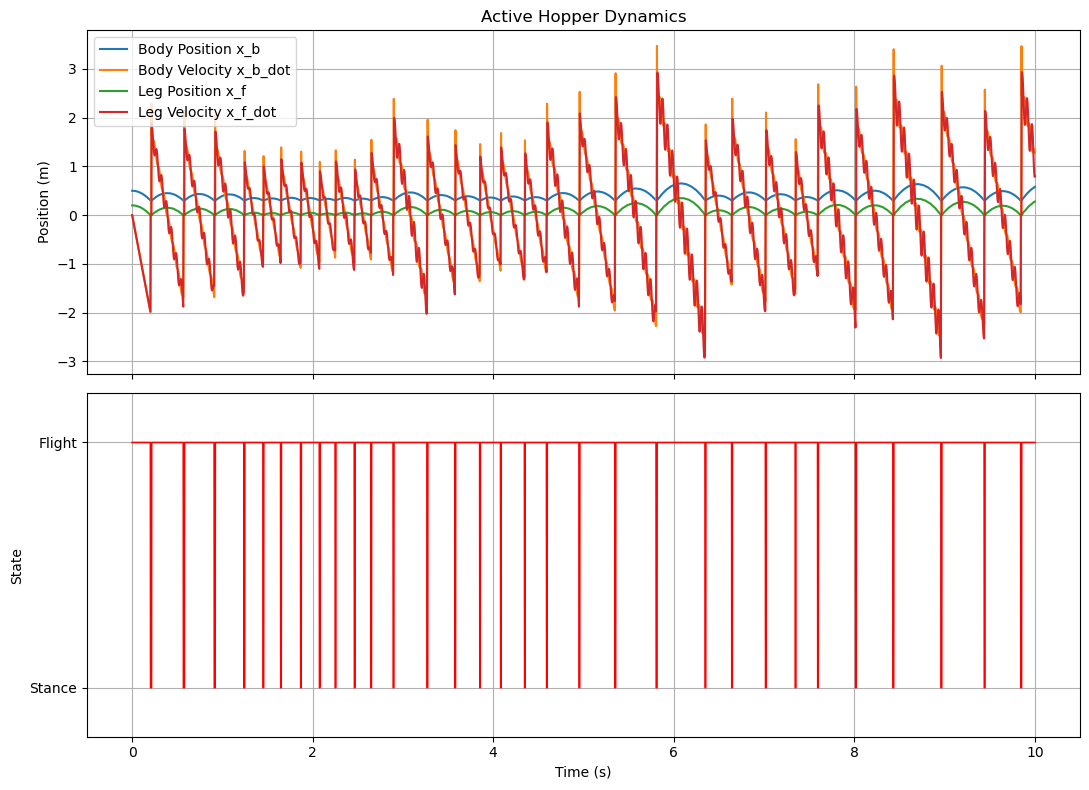

In [136]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 1, figsize=(11, 8), sharex=True)

# ============================================================
# FIGURE 1 — Hopper Dynamics
# ============================================================

# ------------------------------------------------------------------
# 1. Body & Leg states
# ------------------------------------------------------------------
axs[0].plot(t, x[:, 0], label="Body Position x_b")
axs[0].plot(t, x[:, 1], label="Body Velocity x_b_dot")
axs[0].plot(t, x[:, 2], label="Leg Position x_f")
axs[0].plot(t, x[:, 3], label="Leg Velocity x_f_dot")

axs[0].grid(True)
axs[0].legend()
axs[0].set_ylabel("Position (m)")
axs[0].set_title("Active Hopper Dynamics")

# ------------------------------------------------------------------
# 2. Flight/Stance Mode
# ------------------------------------------------------------------
axs[1].plot(t, state_arr, 'r-', linewidth=1.2)
axs[1].set_ylim(-0.2, 1.2)
axs[1].set_yticks([0, 1])
axs[1].set_yticklabels(["Stance", "Flight"])
axs[1].set_ylabel("State")
axs[1].grid(True)

axs[1].set_xlabel("Time (s)")

plt.tight_layout()
plt.show()


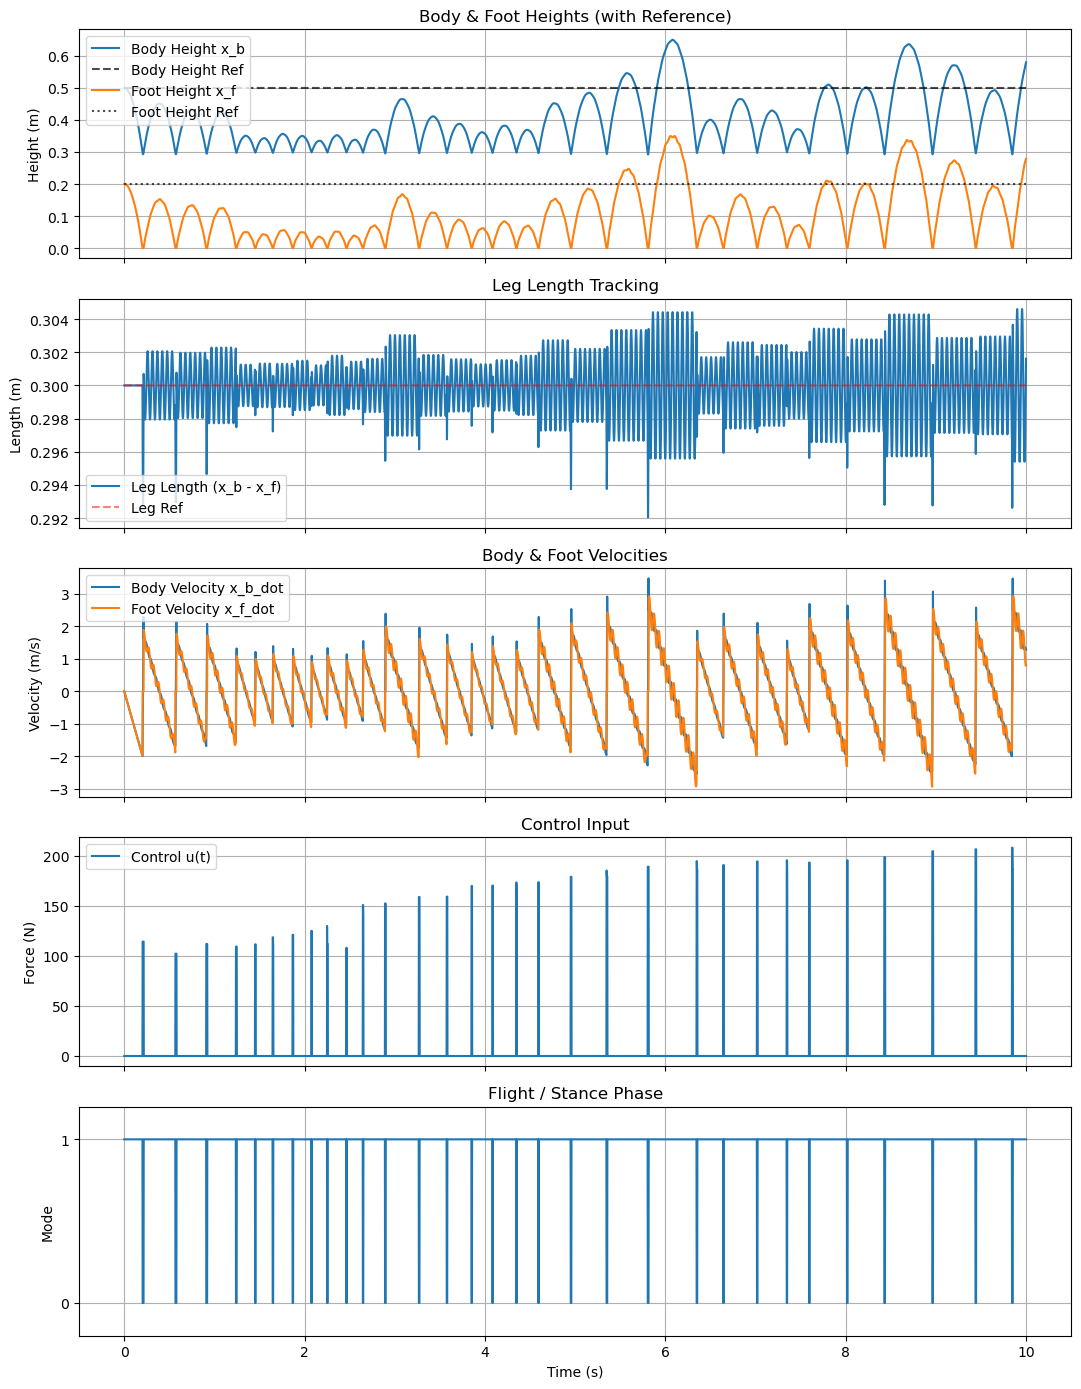

In [132]:
import matplotlib.pyplot as plt

# ============================================================
# Extract reference signals
# ============================================================

body_ref_traj = target_height                     # constant reference or trajectory
foot_ref_traj = nlp_cfg["foot_ref"] * np.ones(steps)
leg_length_ref_traj = nlp_cfg["l_ref"] * np.ones(steps)

# ============================================================
# Plotting
# ============================================================
fig, axs = plt.subplots(5, 1, figsize=(11, 14), sharex=True)

# ------------------------------------------------------------
# 1. Body & Foot Heights
# ------------------------------------------------------------
axs[0].plot(t, x[:, 0], label="Body Height x_b")
axs[0].plot(t, body_ref_traj, 'k--', label="Body Height Ref", alpha=0.7)

axs[0].plot(t, x[:, 2], label="Foot Height x_f")
axs[0].plot(t, foot_ref_traj, 'k:', label="Foot Height Ref", alpha=0.7)

axs[0].set_ylabel("Height (m)")
axs[0].set_title("Body & Foot Heights (with Reference)")
axs[0].legend()
axs[0].grid(True)

# ------------------------------------------------------------
# 2. Leg Length
# ------------------------------------------------------------
leg_length = x[:, 0] - x[:, 2]

axs[1].plot(t, leg_length, label="Leg Length (x_b - x_f)")
axs[1].plot(t, leg_length_ref_traj, 'r--', label="Leg Ref", alpha=0.5)

axs[1].set_ylabel("Length (m)")
axs[1].set_title("Leg Length Tracking")
axs[1].legend()
axs[1].grid(True)

# ------------------------------------------------------------
# 3. Velocities
# ------------------------------------------------------------
axs[2].plot(t, x[:, 1], label="Body Velocity x_b_dot")
axs[2].plot(t, x[:, 3], label="Foot Velocity x_f_dot")

axs[2].set_ylabel("Velocity (m/s)")
axs[2].set_title("Body & Foot Velocities")
axs[2].legend()
axs[2].grid(True)

# ------------------------------------------------------------
# 4. Control Input
# ------------------------------------------------------------
axs[3].plot(t, u_hist, label="Control u(t)")

axs[3].set_ylabel("Force (N)")
axs[3].set_title("Control Input")
axs[3].legend()
axs[3].grid(True)

# ------------------------------------------------------------
# 5. Mode Sequence (Flight/Stance)
# ------------------------------------------------------------
axs[4].plot(t, state_arr, label="Mode (1 Flight, 0 Stance)")

axs[4].set_ylim(-0.2, 1.2)
axs[4].set_yticks([0, 1])
axs[4].set_ylabel("Mode")
axs[4].set_title("Flight / Stance Phase")
axs[4].grid(True)
axs[4].set_xlabel("Time (s)")

plt.tight_layout()
plt.show()


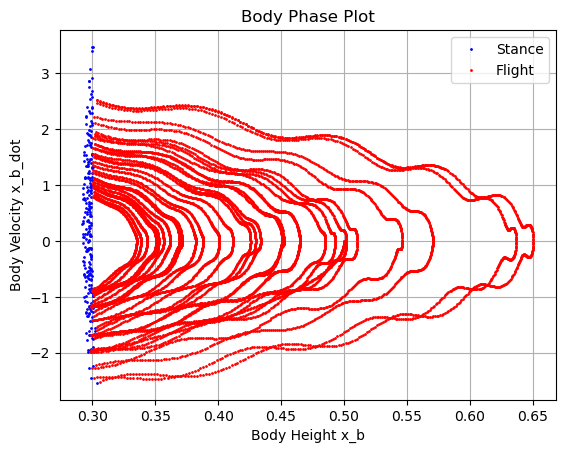

In [133]:
# ============================================================
# Phase Plots (clean version)
# ============================================================
l = x[:, 0] - x[:, 2]
ldot = x[:, 1] - x[:, 3]

mask_flight = state_arr > 0.5
mask_stance = ~mask_flight

plt.plot(x[mask_stance, 0], x[mask_stance, 1], '.', color='blue', markersize=2, label="Stance")
plt.plot(x[mask_flight, 0], x[mask_flight, 1], '.', color='red', markersize=2, label="Flight")

plt.xlabel("Body Height x_b")
plt.ylabel("Body Velocity x_b_dot")
plt.title("Body Phase Plot")
plt.grid(True)
plt.legend()


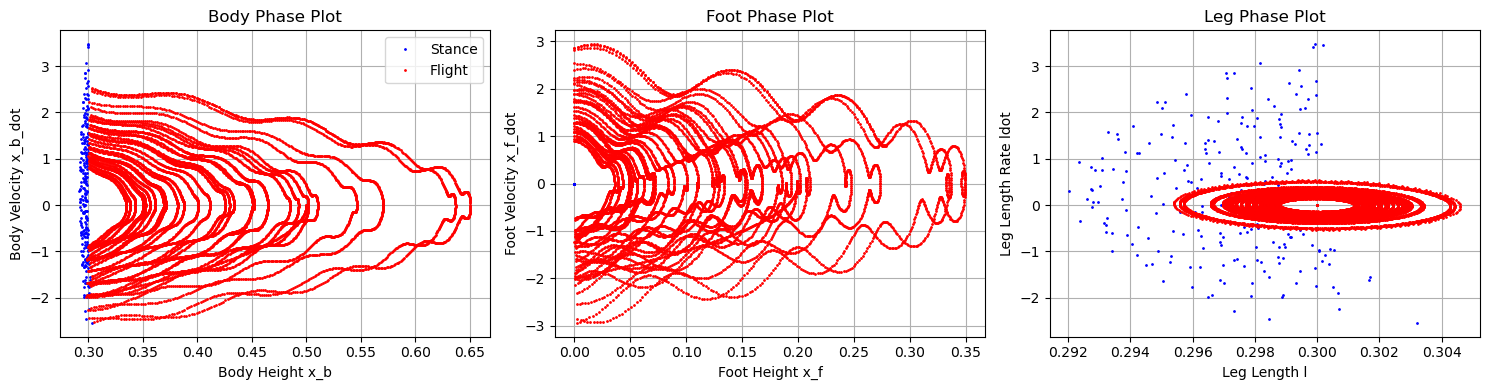

In [134]:
# ============================================================
# Phase Plots (added)
# ============================================================
l = x[:,0] - x[:,2]
ldot = x[:,1] - x[:,3]

# stance = 0, flight = 1
mask_flight = state_arr > 0.5
mask_stance = ~mask_flight

fig2, axs2 = plt.subplots(1, 3, figsize=(15, 4))

# ------------------------------------------------------------
# 1. Body Phase Plot
# ------------------------------------------------------------
axs2[0].plot(x[mask_stance,0], x[mask_stance,1], 'b.', label="Stance", markersize=2)
axs2[0].plot(x[mask_flight,0], x[mask_flight,1], 'r.', label="Flight", markersize=2)

axs2[0].set_xlabel("Body Height x_b")
axs2[0].set_ylabel("Body Velocity x_b_dot")
axs2[0].set_title("Body Phase Plot")
axs2[0].grid(True)
axs2[0].legend()

# ------------------------------------------------------------
# 2. Foot Phase Plot
# ------------------------------------------------------------
axs2[1].plot(x[mask_stance,2], x[mask_stance,3], 'b.', markersize=2)
axs2[1].plot(x[mask_flight,2], x[mask_flight,3], 'r.', markersize=2)

axs2[1].set_xlabel("Foot Height x_f")
axs2[1].set_ylabel("Foot Velocity x_f_dot")
axs2[1].set_title("Foot Phase Plot")
axs2[1].grid(True)

# ------------------------------------------------------------
# 3. Leg Phase Plot
# ------------------------------------------------------------
axs2[2].plot(l[mask_stance], ldot[mask_stance], 'b.', markersize=2)
axs2[2].plot(l[mask_flight], ldot[mask_flight], 'r.', markersize=2)

axs2[2].set_xlabel("Leg Length l")
axs2[2].set_ylabel("Leg Length Rate ldot")
axs2[2].set_title("Leg Phase Plot")
axs2[2].grid(True)

plt.tight_layout()
plt.show()


#### Visualize in PyBullet

In [135]:
# ======================================
#  PyBullet visualization for GRP Hopper
#  (Now with red reference marker sphere)
# ======================================
import pybullet as p
import pybullet_data
import time
import numpy as np

# --- Initialize PyBullet ---
p.connect(p.GUI)
p.setAdditionalSearchPath(pybullet_data.getDataPath())
p.setGravity(0, 0, -9.81)

plane = p.loadURDF("plane.urdf", [0, 0, -0.02])

# --- Visual parameters ---
h_body = 0.05   
h_foot = 0.025 

spring_color = [0, 1, 0]   # green
# reference marker color
ref_color = [1, 0, 0, 1]   # red (ball)

# --- Create shapes ---
body_visual = p.createVisualShape(
    p.GEOM_BOX, halfExtents=[h_body, h_body, h_body], rgbaColor=[0, 0, 1, 1]
)
foot_visual = p.createVisualShape(
    p.GEOM_BOX, halfExtents=[h_foot, h_foot, h_foot], rgbaColor=[1, 0.5, 0, 1]
)
body_col = p.createCollisionShape(p.GEOM_BOX, halfExtents=[h_body, h_body, h_body])
foot_col = p.createCollisionShape(p.GEOM_BOX, halfExtents=[h_foot, h_foot, h_foot])

# --- Hopper body + foot ---
body = p.createMultiBody(
    baseMass=1,
    baseCollisionShapeIndex=body_col,
    baseVisualShapeIndex=body_visual,
    basePosition=[0, 0, x[0, 0] + h_body],
)
foot = p.createMultiBody(
    baseMass=1,
    baseCollisionShapeIndex=foot_col,
    baseVisualShapeIndex=foot_visual,
    basePosition=[0, 0, x[0, 2] + h_foot],
)

# -------------------------------------------
#   Create a RED SPHERE as reference marker
# -------------------------------------------
ref_radius = 0.03

ref_visual = p.createVisualShape(
    p.GEOM_SPHERE,
    radius=ref_radius,
    rgbaColor=ref_color
)

ref_col = p.createCollisionShape(
    p.GEOM_SPHERE,
    radius=1e-6    # no collision
)

ref_ball = p.createMultiBody(
    baseMass=0,
    baseCollisionShapeIndex=ref_col,
    baseVisualShapeIndex=ref_visual,
    basePosition=[0.3, 0, target_height[0]]   # initial pos
)

# -------------------------------------------
#              Animation Loop
# -------------------------------------------
try:
    print("Press Ctrl+C in terminal to stop simulation.")
    start_time = time.time()

    for i in range(len(t)):
        # current hopper positions
        z_body = x[i, 0]
        z_foot = x[i, 2]
        in_flight = state_arr[i] > 0.5

        if not in_flight:
            z_foot = 0.0

        p.resetBasePositionAndOrientation(body, [0, 0, z_body + h_body], [0, 0, 0, 1])
        p.resetBasePositionAndOrientation(foot, [0, 0, z_foot + h_foot], [0, 0, 0, 1])

        p.removeAllUserDebugItems()

        # ----- spring line -----
        if not in_flight:
            p.addUserDebugLine(
                [0, 0, z_foot + h_foot],
                [0, 0, z_body + h_body],
                spring_color,
                7,
                dt,
            )

        # ----- RED REFERENCE BALL -----
        z_ref = target_height[i]
        p.resetBasePositionAndOrientation(
            ref_ball,
            [0.3, 0, z_ref],    # move ball up/down
            [0, 0, 0, 1]
        )

        # ----- Real-time sync -----
        target_time = start_time + t[i]
        sleep_time = target_time - time.time()
        if sleep_time > 0:
            time.sleep(sleep_time)

except KeyboardInterrupt:
    print("\nAnimation stopped by user.")
finally:
    p.disconnect()


ModuleNotFoundError: No module named 'pybullet'

#### Visualize in PyPlot

In [ ]:
# import matplotlib.pyplot as plt
# import matplotlib.animation as animation
# import numpy as np

# # --- Set up figure ---
# fig, ax = plt.subplots(figsize=(6, 6))
# ax.set_xlim(-0.2, 0.2)
# ax.set_ylim(-0.1, np.max(x[:, 0]) + 0.3)
# ax.set_xlabel("Horizontal position (m)")
# ax.set_ylabel("Vertical position (m)")
# ax.set_title("Simplified GRP Hopper Animation")

# # Elements: body (blue), leg (red), spring (green)
# body_dot, = ax.plot([], [], 'bo', markersize=10, label='Body')
# foot_dot, = ax.plot([], [], 'ro', markersize=6, label='Foot')
# spring_ln, = ax.plot([], [], 'g-', linewidth=3, label='Spring')
# ax.legend()
# ax.grid(True)

# # --- Initialization ---
# def init():
#     body_dot.set_data([], [])
#     foot_dot.set_data([], [])
#     spring_ln.set_data([], [])
#     return body_dot, foot_dot, spring_ln

# # --- Update frame ---
# def update(i):
#     x_b = x[i, 0]  # body height
#     x_f = x[i, 2]  # foot height
#     in_flight = state_arr[i] > 0.5

#     # In stance, the foot is on the ground
#     if not in_flight:
#         x_f = 0.0
#         spring_ln.set_data([0, 0], [x_f, x_b])
#     else:
#         spring_ln.set_data([], [])

#     body_dot.set_data([0], [x_b])
#     foot_dot.set_data([0], [x_f])
#     return body_dot, foot_dot, spring_ln

# # --- Create animation ---
# ani = animation.FuncAnimation(
#     fig,
#     update,
#     frames=len(t),
#     init_func=init,
#     blit=True,
#     interval=max(dt * 1000, 10),
#     repeat=True
# )

# plt.show()